In [84]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from DLC_for_WBFM.utils.projects.finished_project_data import ProjectData

# fname = "/scratch/zimmer/Charles/dlc_stacks/worm3-2021_09_29/project_config.yaml"
fname = "/scratch/zimmer/Charles/dlc_stacks/project-pytest/project_config.yaml"
project_data = ProjectData.load_final_project_data_from_config(fname)

Project data for directory:
/scratch/zimmer/Charles/dlc_stacks/worm3-2021_09_29 
Found the following data files:
red_data: True
green_data: True
============Segmentation===============
raw_segmentation: True
segmentation: False
============Tracklets==================
df_training_tracklets: True
reindexed_masks_training: True
============Traces=====================
red_traces: False
green_traces: False
final_tracks: True
behavior_annotations: False



# Check the frame pairs and their methods

In [3]:
# frames = project_data.raw_frames
matches = project_data.raw_matches

In [68]:
key = (0, 1)
m = matches[key]
print(m)
m.min_confidence

FramePair with 97/155 matches 



0.0001

In [69]:
m.print_candidates_by_method()

Found 56 candidates via feature matching
Found 85 candidates via affine matching
Found 105 candidates via gaussian process matching
Processed these into 97 final matches candidates


In [72]:
m.calc_final_matches_using_bipartite_matching(min_confidence=0.1, z_threshold=3)
m

FramePair with 37/155 matches 

In [71]:
m.print_candidates_by_method()

Found 56 candidates via feature matching
Found 85 candidates via affine matching
Found 105 candidates via gaussian process matching
Processed these into 80 final matches candidates


In [59]:
test_match = (2,45)

m.print_reason_for_match(test_match)
            

Found match (2, 45) with confidence 0.16636827748857533
Same match from feature method with confidence: 0.1679292194164154
Neuron not matched using affine method
Neuron not matched using gaussian process method


In [60]:
# m.print_reason_for_all_final_matches()

In [80]:
m.add_affine_to_candidates = False
m.add_gp_to_candidates = False

m.calc_final_matches_using_bipartite_matching(min_confidence=0.1, z_threshold=30)
m

FramePair with 56/155 matches 

In [75]:
m.print_candidates_by_method()

Found 56 candidates via feature matching
Found 85 candidates via affine matching
Found 105 candidates via gaussian process matching
Processed these into 26 final matches candidates


In [ ]:
# m.final_matches

In [43]:
import pandas as pd

df = pd.DataFrame(m.final_matches, columns=['index_frame0', 'index_frame1', 'likelihood'])

In [76]:
list(df['index_frame1'])

[45,
 61,
 9,
 54,
 46,
 21,
 72,
 30,
 35,
 14,
 44,
 34,
 152,
 171,
 94,
 69,
 102,
 38,
 0,
 67,
 2,
 43,
 37,
 73,
 16,
 77,
 4,
 128,
 85,
 36,
 24,
 71,
 33,
 79,
 112,
 12,
 167,
 148,
 52,
 146,
 60,
 155,
 107,
 161,
 170,
 103,
 111,
 97,
 89,
 75,
 66,
 3,
 96,
 90,
 13,
 68,
 117,
 169,
 139,
 119,
 116,
 129,
 123,
 160,
 55,
 41,
 20,
 131,
 126,
 136,
 165,
 86,
 25,
 151,
 135,
 132,
 137,
 156,
 140,
 125,
 40,
 150,
 104,
 114,
 70,
 51,
 142,
 101,
 134,
 133,
 118,
 122,
 92,
 105,
 130,
 138,
 113]

In [45]:
df.to_csv('training_matches01.csv')

# Napari of single match

In [33]:
pair = (0,1)
which_matches = 'feature_matches'
project_data.napari_of_single_match(pair, which_matches)

In [3]:
from DLC_for_WBFM.utils.feature_detection.utils_features import detect_features_and_match
import cv2

In [53]:
pair = (0,1)

this_match = project_data.raw_matches[pair]
f0, f1 = this_match.frame0, this_match.frame1
this_match, f0, f1

(FramePair with 67/155 matches ,
 ReferenceFrame with 155 neurons ,
 ReferenceFrame with 172 neurons )

## Redo affine matching

In [44]:
this_match.match_using_local_affine()

  0%|          | 0/32 [00:00<?, ?it/s]

In [48]:
this_match.calc_final_matches_using_bipartite_matching();

In [52]:
which_matches = 'affine_matches'
project_data.napari_of_single_match(pair, which_matches)

In [49]:
which_matches = 'final_matches'
project_data.napari_of_single_match(pair, which_matches)

## Redo feature embedding with different settings

In [ ]:
pair = (0,1)
match = project_data.raw_matches
f0, f1 = match.frame0, match.frame1

In [ ]:
f0.options_2d_encoder = {'scale_factor': 16.0}
f1.options_2d_encoder = {'scale_factor': 16.0}

In [74]:
this_match.match_using_feature_embedding(matches_to_keep=0.9, crossCheck=False)

In [75]:
# this_match.calc_final_matches_using_bipartite_matching();

In [80]:
which_matches = 'feature_matches'
project_data.napari_of_single_match(pair, which_matches)

In [79]:
this_match.frame0.get_default_base_2d_encoder()

<xfeatures2d_VGG 0x7f8514829bf0>

In [ ]:
cv2.xfeatures2d.VGG_create()

In [5]:
# i = 16

# f0 = this_match.frame0
# im0 = f0.get_raw_data()[i,...]
# # im0 = np.max(f0.get_raw_data(), axis=0)

# f1 = this_match.frame1
# im1 = f1.get_raw_data()[i,...]
# # im1 = np.max(f1.get_raw_data(), axis=0)

In [6]:
# %matplotlib inline
# plt.imshow(f1_mip)

In [7]:

# keypoints0, keypoints1, matches = detect_features_and_match(im0, im1, 10000, 0.8, True)

In [8]:

# imMatches = cv2.drawMatches(im0, keypoints0, im1, keypoints1, matches, None)
# fig, axis = plt.subplots(figsize=(45, 15))
# plt.imshow(imMatches)

In [78]:
f0.keypoint_locs[:5]

array([[  4.94108405, 297.76355067, 424.09347997],
       [  4.53575358, 313.32233223, 433.17491749],
       [  5.66034483, 279.91896552, 418.12758621],
       [  5.89900427, 300.15647226, 349.30440967],
       [  6.06699752, 308.28411911, 399.21712159]])

In [79]:
f0.neuron_locs[:5]

array([[  4.94108405, 297.76355067, 424.09347997],
       [  4.53575358, 313.32233223, 433.17491749],
       [  5.66034483, 279.91896552, 418.12758621],
       [  5.89900427, 300.15647226, 349.30440967],
       [  6.06699752, 308.28411911, 399.21712159]])

In [83]:
this_match.keypoint_matches[:5]

[(2, 45, 0.1679292194164154),
 (8, 21, 0.18317314442107907),
 (12, 35, 0.1720259091798729),
 (16, 44, 0.18153404747547808),
 (18, 166, 0.14453631350279791)]

In [84]:
this_match.feature_matches[:5]

[(2, 45, 0.1679292194164154),
 (8, 21, 0.18317314442107907),
 (12, 35, 0.1720259091798729),
 (16, 44, 0.18153404747547808),
 (18, 166, 0.14453631350279791)]

  0%|          | 0/32 [00:00<?, ?it/s]

AttributeError: 'list' object has no attribute 'queryIdx'

In [97]:
%debug

> /home/charles/Current_work/repos/dlc_for_wbfm/DLC_for_WBFM/utils/external/utils_cv2.py(90)<listcomp>()
     86 
     87     def conf(dist):
     88         return np.tanh(gamma / (dist + 1e-9 * gamma))
     89 
---> 90     return [(m.queryIdx+index_offset, m.trainIdx+index_offset, conf(m.distance)) for m in cv2_matches]



ipdb>  u


> /home/charles/Current_work/repos/dlc_for_wbfm/DLC_for_WBFM/utils/external/utils_cv2.py(90)cast_matches_as_array()
     86 
     87     def conf(dist):
     88         return np.tanh(gamma / (dist + 1e-9 * gamma))
     89 
---> 90     return [(m.queryIdx+index_offset, m.trainIdx+index_offset, conf(m.distance)) for m in cv2_matches]



ipdb>  u


> /home/charles/Current_work/repos/dlc_for_wbfm/DLC_for_WBFM/utils/feature_detection/class_frame_pair.py(189)match_using_local_affine()
    187         frame1.keypoint_locs = kp1_locs
    188         frame1.keypoints = all_kp1
--> 189         kp_matches = recursive_cast_matches_as_array(kp_matches, gamma=1.0)
    190         self.keypoint_matches = kp_matches
    191         # Then match using distance from neuron position to keypoint cloud



ipdb>  d


> /home/charles/Current_work/repos/dlc_for_wbfm/DLC_for_WBFM/utils/external/utils_cv2.py(90)cast_matches_as_array()
     86 
     87     def conf(dist):
     88         return np.tanh(gamma / (dist + 1e-9 * gamma))
     89 
---> 90     return [(m.queryIdx+index_offset, m.trainIdx+index_offset, conf(m.distance)) for m in cv2_matches]



ipdb>  q


In [89]:
this_match.final_matches

[(5, 9, 0.10664930928913127),
 (8, 21, 0.8394756255038409),
 (12, 35, 0.8349478951539584),
 (16, 44, 0.17956585981719214),
 (43, 43, 0.84885344892994),
 (44, 37, 0.11685128653108444),
 (51, 85, 0.25780942376488936),
 (55, 71, 0.845149949328259),
 (57, 79, 0.8219293506450835),
 (65, 146, 0.13224653472811124),
 (75, 161, 0.35186514736304203),
 (77, 103, 0.8909225482458489),
 (82, 97, 0.16936013942180073),
 (83, 89, 0.146637456126493),
 (86, 66, 0.35553324082900384),
 (89, 96, 0.20123047112487855),
 (90, 90, 0.8650401580931686),
 (102, 116, 0.21765459415362684),
 (103, 129, 0.16864172649745937),
 (104, 123, 0.8296511518132528),
 (115, 131, 0.23441914460936078),
 (116, 126, 0.21390742578557848),
 (117, 136, 0.38958833634777984),
 (124, 135, 0.20468550754577922),
 (125, 132, 0.22285427130257393),
 (127, 137, 0.19591889296164688),
 (129, 140, 0.2214390134778058),
 (131, 125, 0.21141014283515877),
 (134, 104, 0.2878642663659094),
 (139, 114, 0.2262245402153866),
 (140, 70, 0.6581799798246538)

# Redo the processing step

In [53]:
from DLC_for_WBFM.utils.pipeline.tracklet_pipeline import postprocess_and_build_tracklets_from_matches

In [54]:
z_threshold, min_confidence = 3, 0.01

In [87]:
df_custom_format = postprocess_and_build_tracklets_from_matches(frames, matches, z_threshold, min_confidence, verbose=0)

  0%|          | 0/1499 [00:00<?, ?it/s]

  0%|          | 0/85259 [00:00<?, ?it/s]

In [88]:
# %debug

In [94]:
df_custom_format['all_xyz'].iloc[3]

[array([  7.56994819, 284.36787565, 313.07668394]),
 array([  8.86567164, 237.89280868, 246.81682497]),
 array([  7.83292079, 239.8279703 , 249.45420792]),
 array([  7.17473118, 220.67741935, 249.70564516])]

In [70]:
f = lambda m: len(m.final_matches)
list_of_all_possible_matches = list(map(f, matches.values()))

In [72]:
sum(list_of_all_possible_matches)

85259

In [ ]:
# matches

# Napari of data and segmentation

# Check the training data tracklets

In [6]:
project_data.df_training_tracklets

bodyparts neuron41334                                   
coords              z           x           y likelihood
1154        17.714404   45.809603  803.128311   0.761594
1155        17.434368   89.210024  797.273667   0.761594
1156        16.923127  195.759609  809.196743   0.761594
1157        16.544801  282.892086  814.283846   0.761594
1158        16.699187  299.646341  815.391260   0.761594
1159        16.878049  296.252772  822.522173   0.761594
1160        16.875261  283.800697  843.716376   0.761594
1161        17.330734  254.048083  848.465237   0.761594
1162        17.074151  221.875260  844.092169   0.761594
1163        17.297656  179.088281  830.907031   0.761594

In [7]:
df = project_data.df_all_tracklets

In [8]:
df

bodyparts    neuron0                                      neuron1              \
coords             z           x           y likelihood         z           x   
0           5.660345  279.918966  418.127586   0.166368  7.202731  333.414916   
1          10.238095  198.596120  252.074074   0.514725  6.767978  255.838535   
2          10.190883  202.854701  253.915954   0.000000  6.342752  248.229730   
3                NaN         NaN         NaN        NaN  8.016667  251.007576   
4                NaN         NaN         NaN        NaN       NaN         NaN   
...              ...         ...         ...        ...       ...         ...   
1494             NaN         NaN         NaN        NaN       NaN         NaN   
1495             NaN         NaN         NaN        NaN       NaN         NaN   
1496             NaN         NaN         NaN        NaN       NaN         NaN   
1497             NaN         NaN         NaN        NaN       NaN         NaN   
1498             NaN         NaN         NaN        NaN       NaN         NaN   

bodyparts                          neuron2              ... neuron53392  \
coords              y likelihood         z           x  ...           y   
0          426.399160   0.106649  7.211518  319.289005  ...         NaN   
1          334.919946   0.715013  7.003396  238.960951  ...         NaN   
2          337.696560   0.220564  6.903636  233.285455  ...         NaN   
3          350.295455   0.000000  5.798103  236.638211  ...         NaN   
4                 NaN        NaN       NaN         NaN  ...         NaN   
...               ...        ...       ...         ...  ...         ...   
1494              NaN        NaN       NaN         NaN  ...         NaN   
1495              NaN        NaN       NaN         NaN  ...         NaN   
1496              NaN        NaN       NaN         NaN  ...  389.761290   
1497              NaN        NaN       NaN         NaN  ...  396.166090   
1498              NaN        NaN       NaN         NaN  ...  401.056954   

bodyparts            neuron53393                                     \
coords    likelihood           z           x           y likelihood   
0                NaN         NaN         NaN         NaN        NaN   
1                NaN         NaN         NaN         NaN        NaN   
2                NaN         NaN         NaN         NaN        NaN   
3                NaN         NaN         NaN         NaN        NaN   
4                NaN         NaN         NaN         NaN        NaN   
...              ...         ...         ...         ...        ...   
1494             NaN         NaN         NaN         NaN        NaN   
1495             NaN         NaN         NaN         NaN        NaN   
1496        0.720831   24.197368  266.289474  350.701754   0.247594   
1497        0.628005   23.145642  281.173165  355.608945   0.529280   
1498        0.000000   20.920354  288.932743  360.299115   0.000000   

bodyparts neuron53394                                     
coords              z           x           y likelihood  
0                 NaN         NaN         NaN        NaN  
1                 NaN         NaN         NaN        NaN  
2                 NaN         NaN         NaN        NaN  
3                 NaN         NaN         NaN        NaN  
4                 NaN         NaN         NaN        NaN  
...               ...         ...         ...        ...  
1494              NaN         NaN         NaN        NaN  
1495              NaN         NaN         NaN        NaN  
1496        21.697744  264.097744  389.206015   0.236089  
1497        23.728856  275.677861  382.752488   0.314322  
1498        25.120983  280.839319  385.992439   0.000000  

[1499 rows x 82944 columns]

(array([6.7836e+04, 8.4840e+03, 3.7440e+03, 1.4880e+03, 7.5200e+02,
        4.7600e+02, 5.6000e+01, 7.2000e+01, 1.2000e+01, 2.4000e+01]),
 array([ 3. ,  4.2,  5.4,  6.6,  7.8,  9. , 10.2, 11.4, 12.6, 13.8, 15. ]),
 <BarContainer object of 10 artists>)

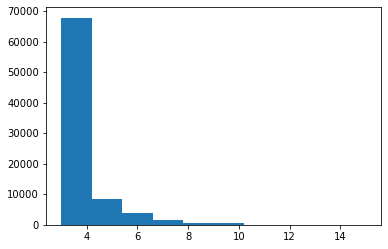

In [11]:
%matplotlib inline
plt.hist(df.count())

(array([ 62., 312., 466., 331., 156.,  85.,  42.,  14.,  23.,   8.]),
 array([ 11. ,  24.1,  37.2,  50.3,  63.4,  76.5,  89.6, 102.7, 115.8,
        128.9, 142. ]),
 <BarContainer object of 10 artists>)

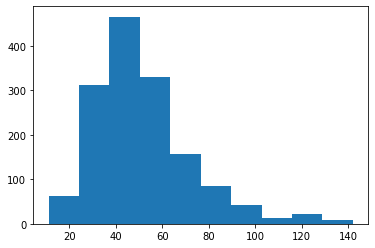

In [12]:
plt.hist(df.count(axis=1)/4.0)

# Get multiple templates using training data

In [8]:
project_data.get_centroids_as_numpy_training(0)

array([[ 17.71623418,  45.81714154, 803.1216552 ]])

In [9]:
project_data.get_centroids_as_numpy_training(1)

array([[ 17.43519699,  89.21272234, 797.28342661]])

In [48]:
a = [dict(a='', b='')]

In [50]:
list(map(len, a))


[2]